In [44]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from cycler import cycler
from collections import defaultdict, OrderedDict
from datetime import datetime

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from benchmark import Options
from bench_api import *

def show_time(f):
    def _wrapper(*args):
        print(datetime.now())
        f(*args)
    return _wrapper

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                               ],
                                         #linestyle=["-", "--", "-.", ":", "-", "--", "-.", ":"]
                                        )

@show_time
def big():
    plt.rcParams["figure.figsize"] = (24, 15)
@show_time
def medium():
    plt.rcParams["figure.figsize"] = (16, 10)
@show_time
def ideal():
    plt.rcParams["figure.figsize"] = (10, 6)
@show_time
def small():
    plt.rcParams["figure.figsize"] = (6, 4)

# Bounded buffer

2017-05-28 11:42:22.129523
Fast production


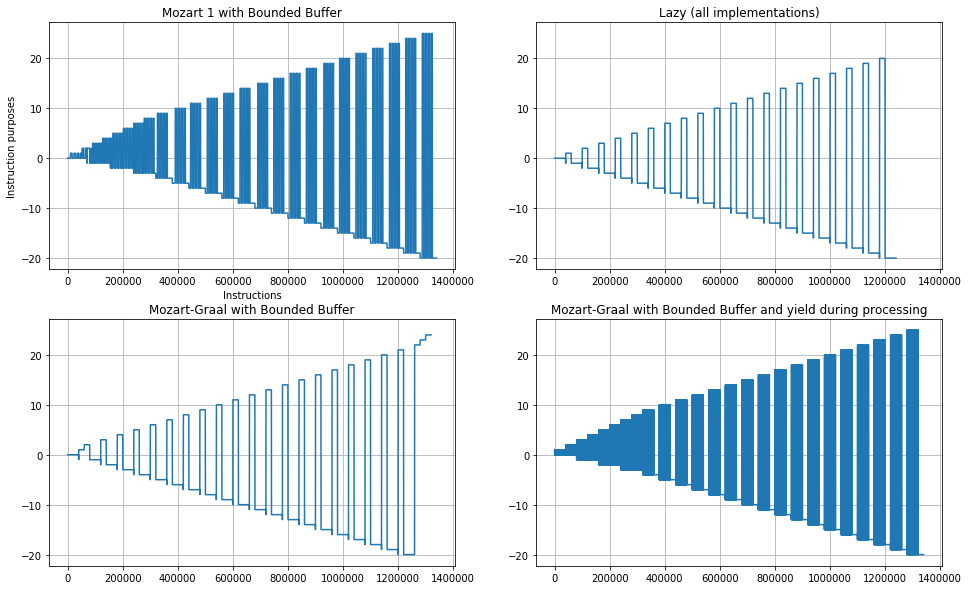

Even speed


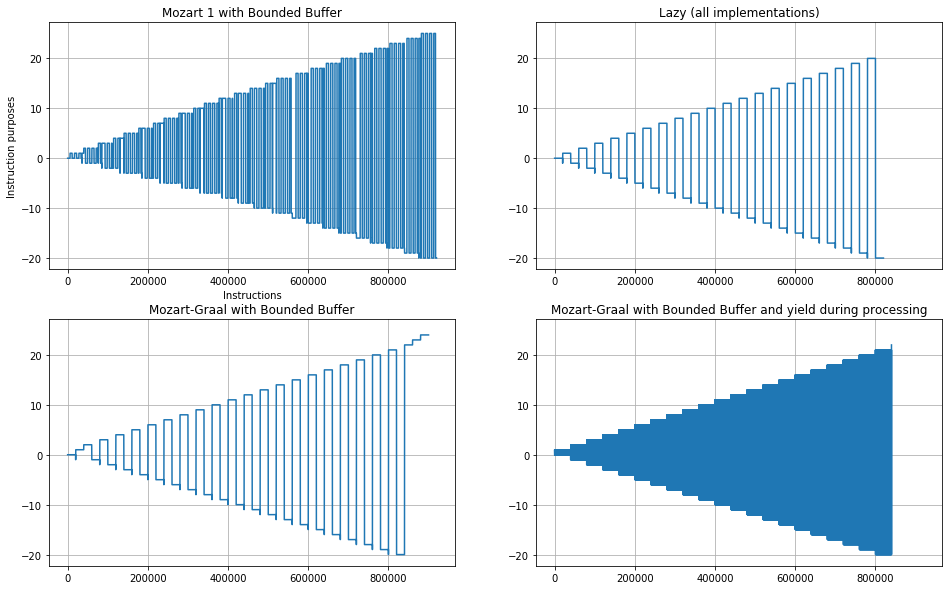

Slow production


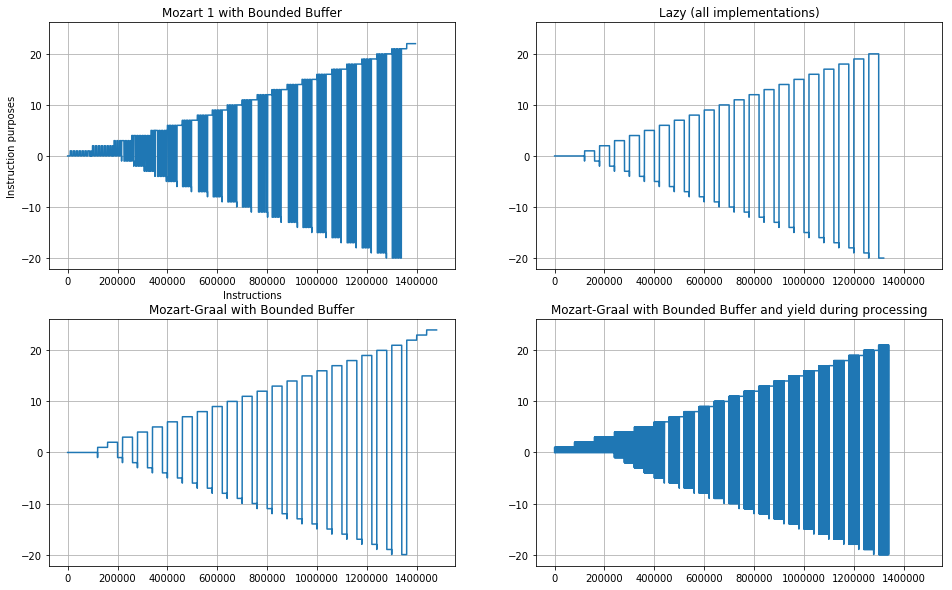

In [56]:
medium()
boundedbuffer = Serie("boundedbuffer")
bb = lambda *args, **kwargs: boundedbuffer.get("active", conv=asis, *args, **kwargs)
ax = []

print("Fast production")
bb([0]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(xlabel="Instructions", ylabel="Instruction purposes", yscale=None, legend=None).grid()
bb([1]).sub(223, sharex=ax[0], sharey=ax[0], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None).grid()
bb([2]).sub(224, sharex=ax[0], sharey=ax[0], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None).grid()
bb([3]).sub(222, sharex=ax[0], sharey=ax[0], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None).grid()
plt.show()

print("Even speed")
bb([4]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(xlabel="Instructions", ylabel="Instruction purposes", yscale=None, legend=None).grid()
bb([5]).sub(223, sharex=ax[1], sharey=ax[1], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None).grid()
bb([6]).sub(224, sharex=ax[1], sharey=ax[1], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None).grid()
bb([7]).sub(222, sharex=ax[1], sharey=ax[1], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None).grid()
plt.show()

print("Slow production")
bb([8]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(xlabel="Instructions", ylabel="Instruction purposes", yscale=None, legend=None).grid()
bb([9]).sub(223, sharex=ax[2], sharey=ax[2], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None).grid()
bb([10]).sub(224, sharex=ax[2], sharey=ax[2], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None).grid()
bb([11]).sub(222, sharex=ax[2], sharey=ax[2], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None).grid()
plt.show()

2017-05-28 15:26:24.744864


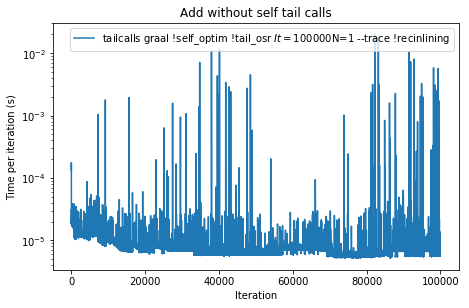

median [  6.62300000e-06]


In [86]:
medium()

tailcalls = Serie("tailcalls", n=range(1))
tail = tailcalls.get("", sections=[0], agg=first)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Add without self tail calls", **args1).plot()
plt.show()

print("median", tail.agg(np.median))

2017-05-29 10:53:08.188740


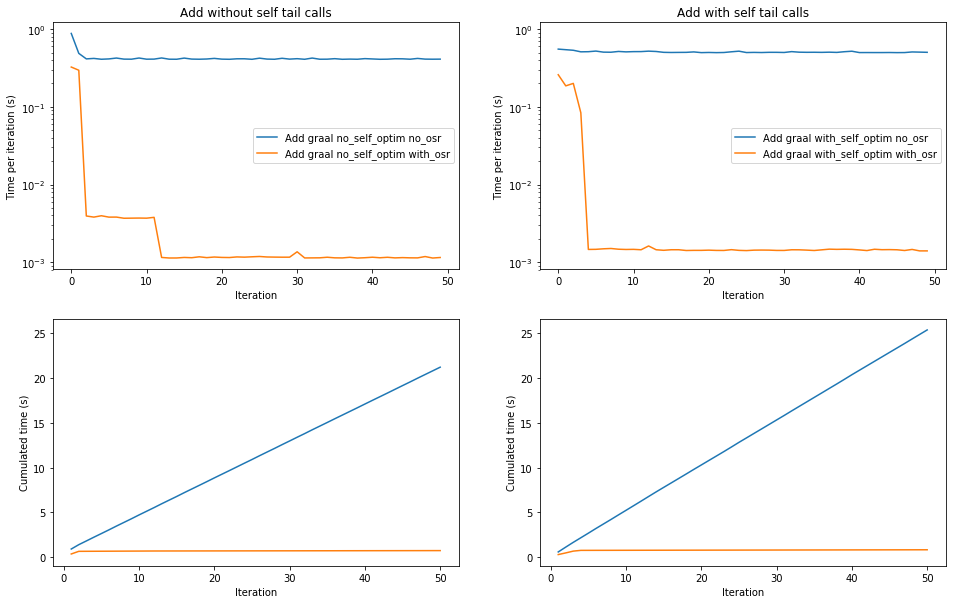

median [ 0.01954753  0.1892825   0.41128383  0.0011599   0.50326684  0.00144712]


In [159]:
medium()

tailcalls = Serie("tailcalls", n=range(1))
tail = tailcalls.get("", sections=[2, 3], agg=geomean)
self = tailcalls.get("", sections=[4, 5], agg=geomean)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Add without self tail calls", **args1).plot(legend=0)
tail.sub(223, init_axis=ax, **args2).prog(legend=None)

self.sub(222, sharey=ax[0], title="Add with self tail calls", **args1).plot(legend="right")
self.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

print("median", tailcalls.get("", agg=geomean).agg(np.median))

2017-05-29 13:22:49.933712


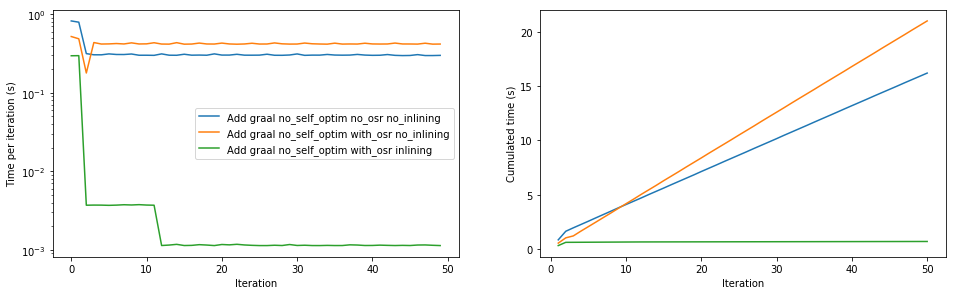

median [ 0.30240405  0.41898978  0.0011468 ]


In [160]:
medium()

inlining = Serie("inlining", n=range(1), prefix="i").get("", agg=geomean)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

inlining.sub(221, init_axis=ax, **args1).plot(legend=0)
inlining.sub(222, init_axis=ax, **args2).prog(legend=None)

#self.sub(222, sharey=ax[0], title="Add with self tail calls", **args1).plot()
#self.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

print("median", inlining.agg(np.median))

2017-05-27 17:21:59.038039


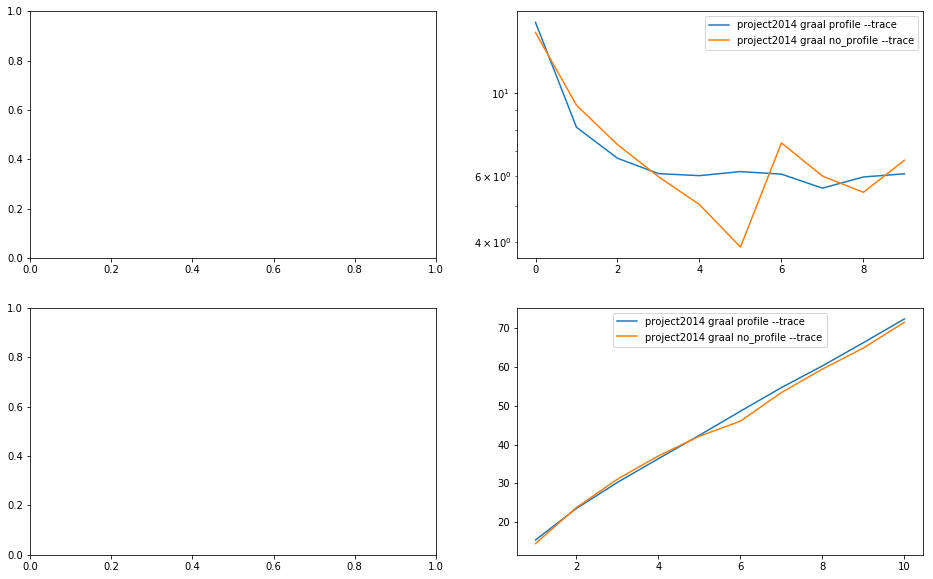

median []


In [163]:
medium()

hard, total = Serie("report_profile").get(("hard", "total"))

hard.sub(221).plot()
hard.sub(223).prog()

total.sub(222).plot()
total.sub(224).prog()
plt.show()

print("median", hard.agg(np.median))

2017-05-27 23:34:22.234742


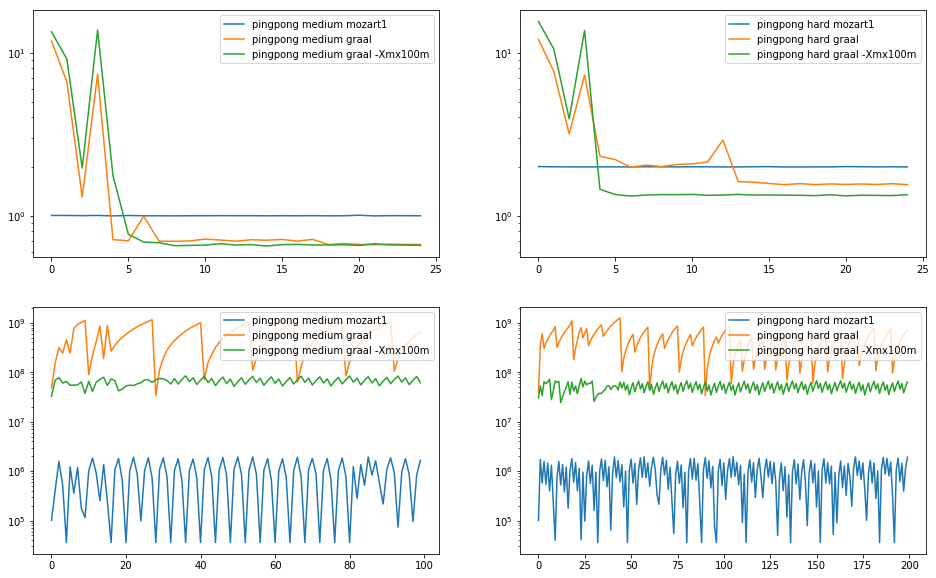

median [ 0.99847867  0.70034252  0.66410845  1.99008322  1.98255865  1.33781199]


In [45]:
medium()
pingpong = Serie("pingpong")

medium_iterations = pingpong.get("iteration", sections=[0, 1, 2])
hard_iterations = pingpong.get("iteration", sections=[3, 4, 5])

medium_memory = pingpong.get("memory", sections=[0, 1, 2], conv=asis)
hard_memory = pingpong.get("memory", sections=[3, 4, 5], conv=asis)

ax = []

medium_iterations.sub(221, init_axis=ax).plot()
hard_iterations.sub(222, sharey=ax[0]).plot()

medium_memory.sub(223, init_axis=ax).plot()
hard_memory.sub(224, sharey=ax[1]).plot()
#memory.sub(222).plot()
plt.show()

print("median", iteration.agg(np.median))

## Pow

In the following graphs, we can see, at the top, the cost of every iteration, and at the bottom, the cumulative time to reach the nth iteration (the plots are vertical in order to be correlated visually)

We can see that

- Graal generally ends up with much faster iterations than mozart2 and the simple truffle interpreter
- Mozart2 is still the big winner in terms of total execution time

2017-05-27 23:36:00.565305


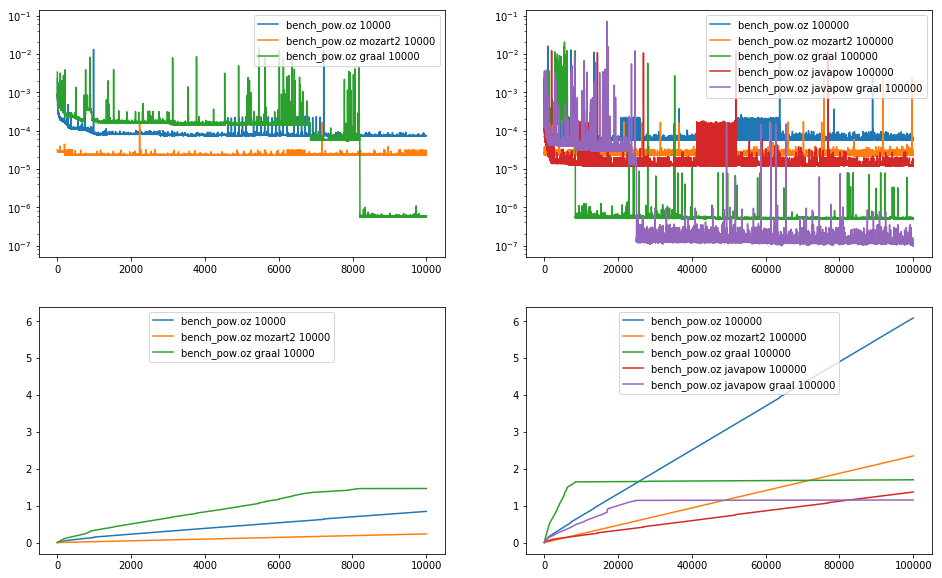

median [  7.39110000e-05   2.30000000e-05   1.44387500e-04]
median [  5.86140000e-05   2.30000000e-05   5.15000000e-07   1.23370000e-05
   1.32000000e-07]


In [46]:
medium()

pow_easy, pow_hard = Serie("pow")["10000", "100000"]
ax = []
pow_easy.sub(221, init_axis=ax).plot()
pow_easy.sub(223, init_axis=ax).prog()

pow_hard.sub(222, sharey=ax[0]).plot()
pow_hard.sub(224, sharey=ax[1]).prog()
plt.show()

print("median", pow_easy.agg(np.median))
print("median", pow_hard.agg(np.median))

## Map

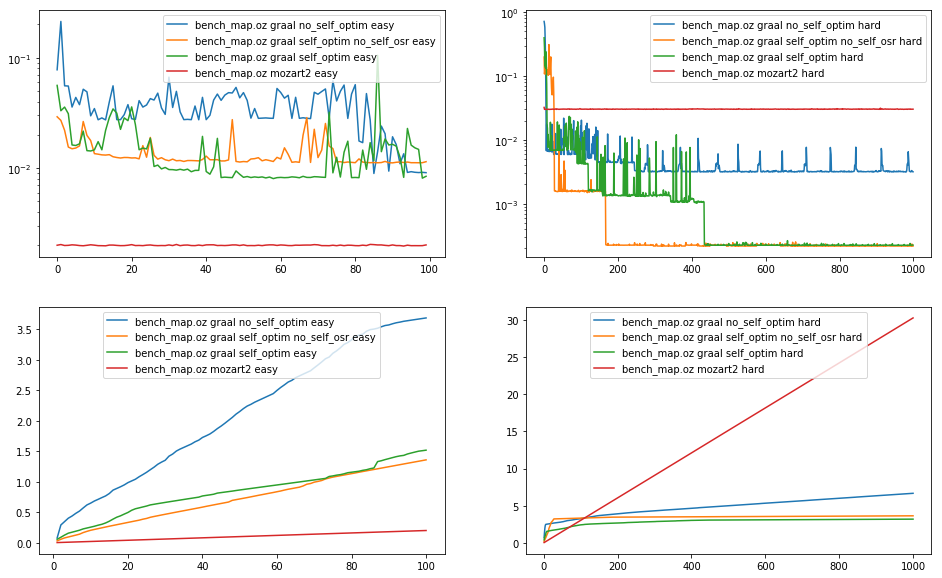

median [ 0.03486617  0.01191818  0.00998661  0.001997  ]
median [ 0.00321291  0.00022389  0.00022576  0.03025   ]


In [29]:
medium()

map_easy, map_hard = Serie("map")["easy", "hard"]

map_easy.sub(221).plot()
map_easy.sub(223).prog()

map_hard.sub(222).plot()
map_hard.sub(224).prog()
plt.show()

print("median", map_easy.agg(np.median))
print("median", map_hard.agg(np.median))

2017-05-28 14:16:53.592532


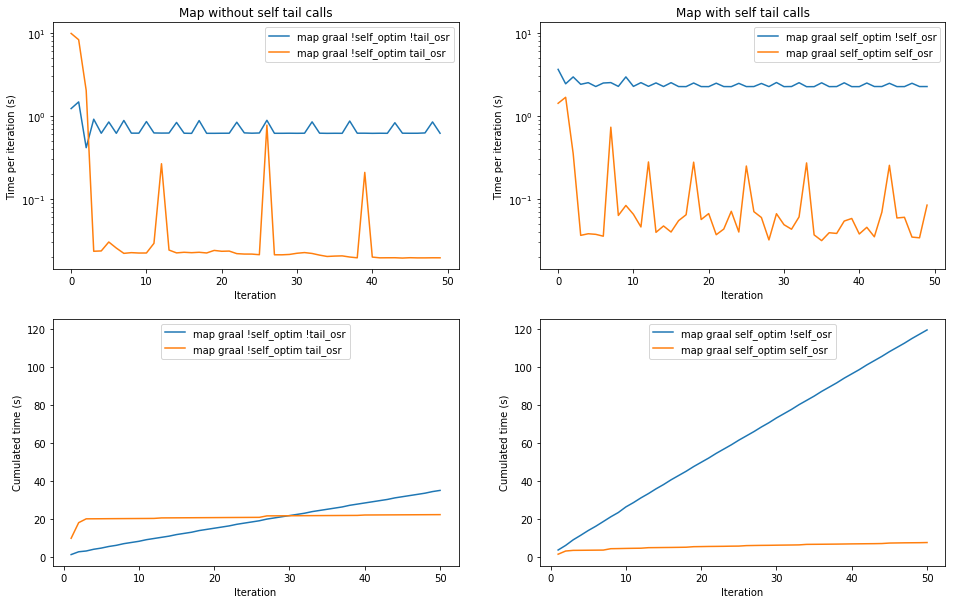

median [ 0.61730934  0.0221538 ]
median [ 2.25415935  0.05560883]


In [63]:
medium()

Map = Serie("map")
tail = Map.get("hard", sections=[0, 1])
self = Map.get("hard", sections=[3, 4])
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Map without self tail calls", **args1).plot()
tail.sub(223, init_axis=ax, **args2).prog()

self.sub(222, sharey=ax[0], title="Map with self tail calls", **args1).plot()
self.sub(224, sharey=ax[1], **args2).prog()
plt.show()

print("median", tail.agg(np.median))
print("median", self.agg(np.median))

## Flatten

2017-05-29 02:47:24.508886


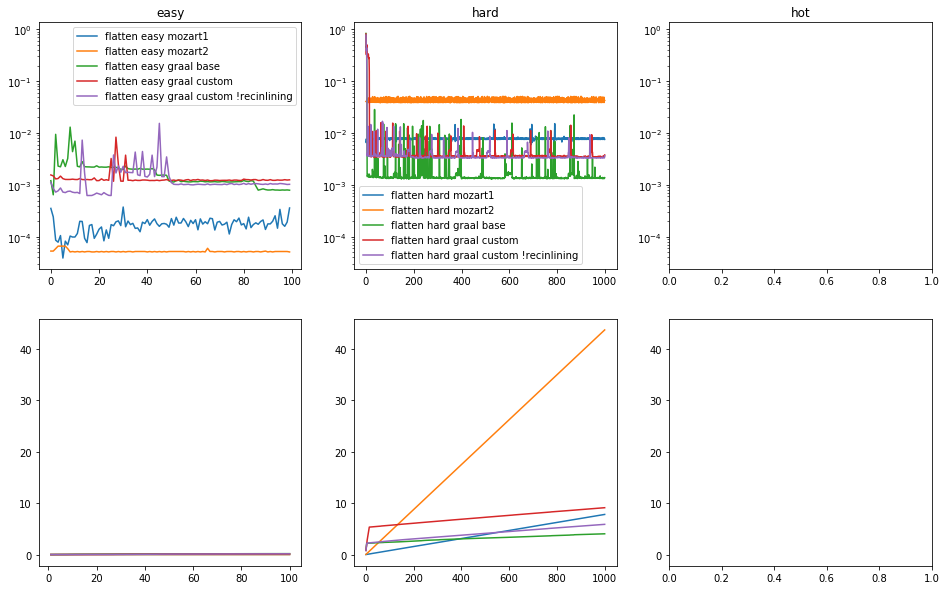

median [  1.76242000e-04   5.20000000e-05   1.20515150e-03   1.23929950e-03
   1.02852000e-03]
median [ 0.00770597  0.043878    0.00136733  0.00356484  0.00335006]
median []


In [144]:
medium()

flatten_easy, flatten_hard = Serie("flatten", n=range(1)).get(("easy", ("hard", "hard_hot")), agg=geomean)

flatten_hard, flatten_hot = flatten_hard
#flatten_hard = merge(flatten_hard, ["{}", "hot {}"])
ax = []

flatten_easy.sub(231, init_axis=ax, title="easy").plot()
flatten_easy.sub(234, init_axis=ax).prog(legend=None)

flatten_hard.sub(232, sharey=ax[0], title="hard").plot(legend=0)
flatten_hard.sub(235, sharey=ax[1]).prog(legend=None)

flatten_hot.sub(233, sharey=ax[0], title="hot").plot()
flatten_hot.sub(236, sharey=ax[1]).prog(legend=None)

plt.show()

print("median", flatten_easy.agg(np.median))
print("median", flatten_hard.agg(np.median))
print("median", flatten_hot.agg(np.median))

2017-05-25 11:42:40.137610


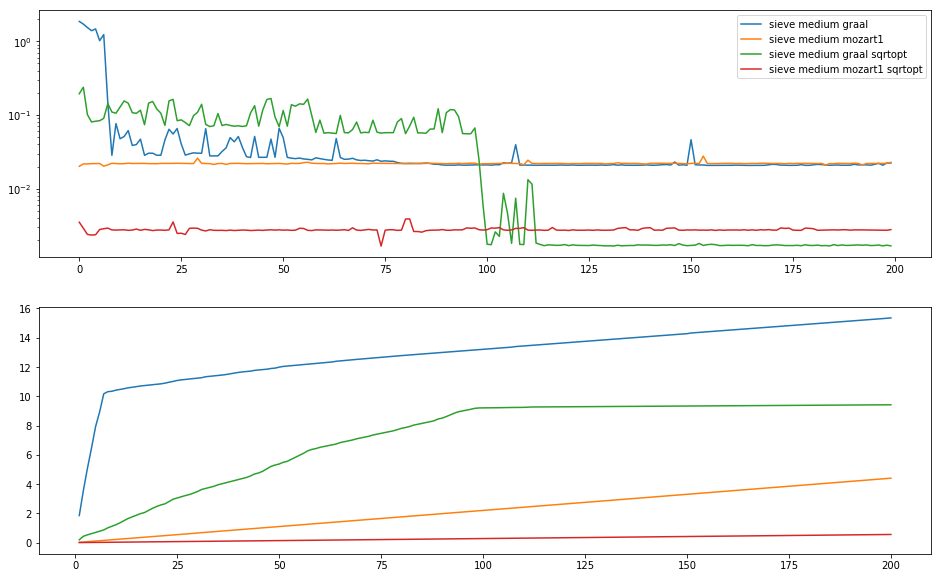

median [ 0.02139994  0.02200143  0.01239988  0.00275542]


In [22]:
medium()

sieve = Serie("sieve", n=range(1)).get("medium")

sieve.sub(211).plot()
sieve.sub(212).prog(legend=None)

plt.show()

print("median", sieve.agg(np.median))

2017-05-27 14:42:56.612532


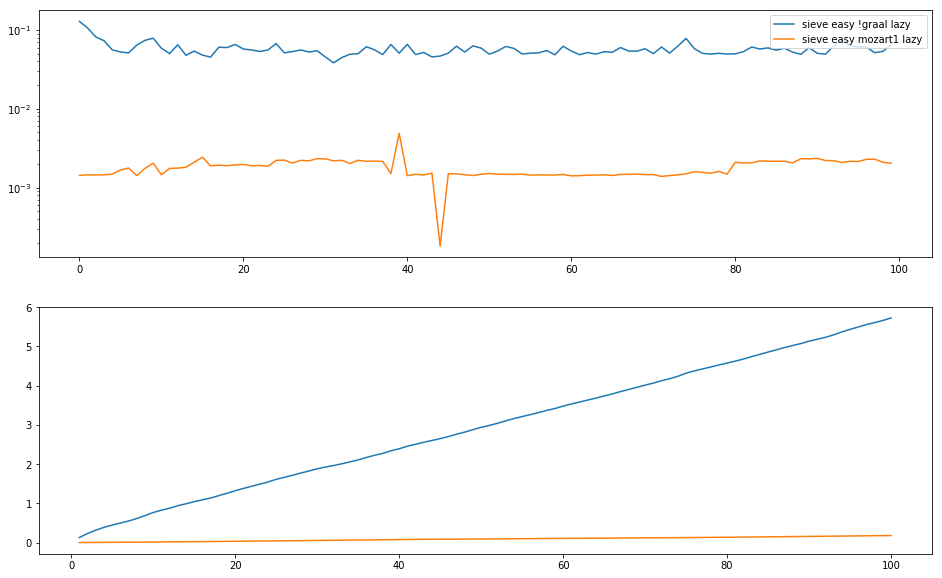

median [ 0.05408813  0.00174979]


In [147]:
medium()

sieve = Serie("sieve", n=range(1)).get("easy")

sieve.sub(211).plot()
sieve.sub(212).prog(legend=None)

plt.show()

print("median", sieve.agg(np.median))

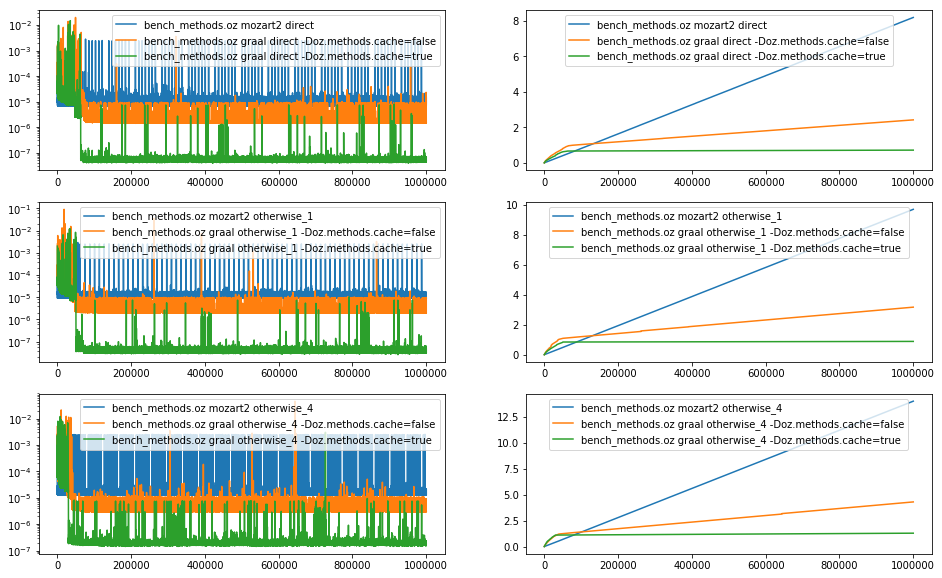

median [  8.00000000e-06   1.52100000e-06   5.40000000e-08]
median [  9.00000000e-06   2.11500000e-06   4.20000000e-08]
median [  1.30000000e-05   3.11100000e-06   1.79000000e-07]


In [57]:
medium()
# As of commit cb63d9c9f1ee2989ddcd80bc73d89c4ce6913af0
direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))

direct.sub(321).plot()
direct.sub(322).prog()
otherwise_1.sub(323).plot()
otherwise_1.sub(324).prog()
otherwise_4.sub(325).plot()
otherwise_4.sub(326).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

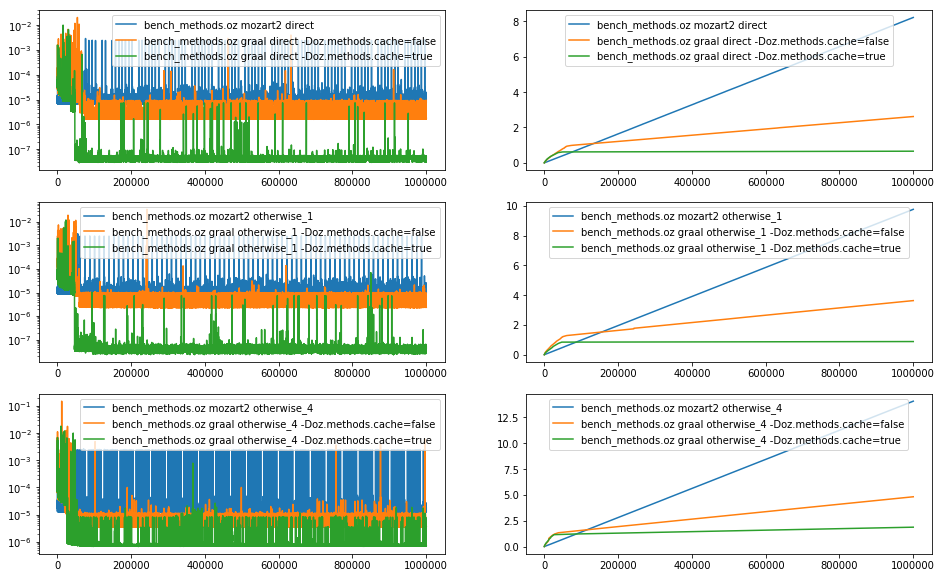

median [  8.00000000e-06   1.73500000e-06   4.30000000e-08]
median [  9.00000000e-06   2.43200000e-06   4.10000000e-08]
median [  1.30000000e-05   3.55300000e-06   7.13000000e-07]


In [60]:
medium()

direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))

direct.sub(321).plot()
direct.sub(322).prog()
otherwise_1.sub(323).plot()
otherwise_1.sub(324).prog()
otherwise_4.sub(325).plot()
otherwise_4.sub(326).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

2017-05-27 23:38:22.733575


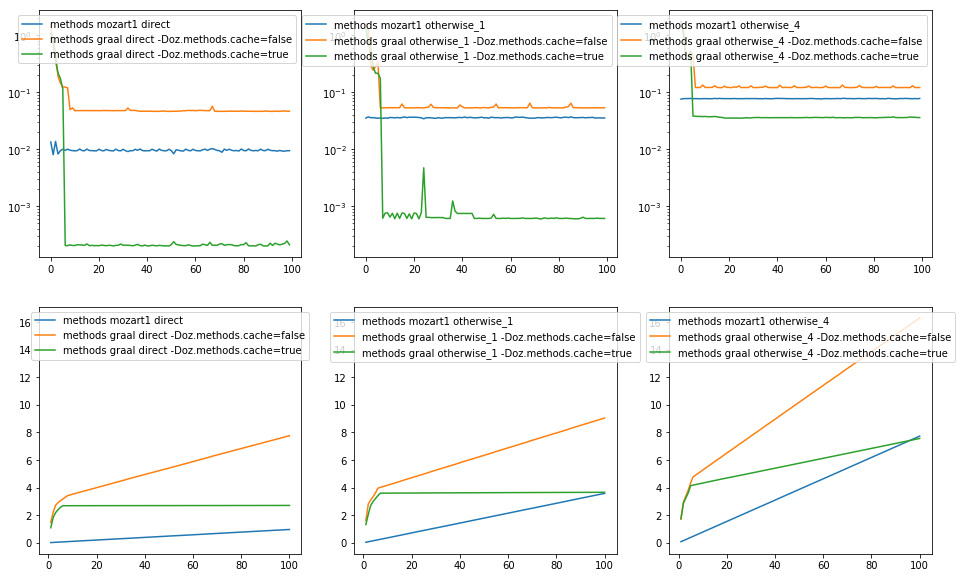

median [ 0.00949142  0.0470277   0.00020539]
median [ 0.03583609  0.05338171  0.0006149 ]
median [ 0.07733194  0.12139969  0.03593187]


In [48]:
medium()

direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))
ax = []
direct.sub(231, init_axis=ax).plot()
direct.sub(234, init_axis=ax).prog()
otherwise_1.sub(232, sharey=ax[0]).plot()
otherwise_1.sub(235, sharey=ax[1]).prog()
otherwise_4.sub(233, sharey=ax[0]).plot()
otherwise_4.sub(236, sharey=ax[1]).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

## Number of links

In [5]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
None

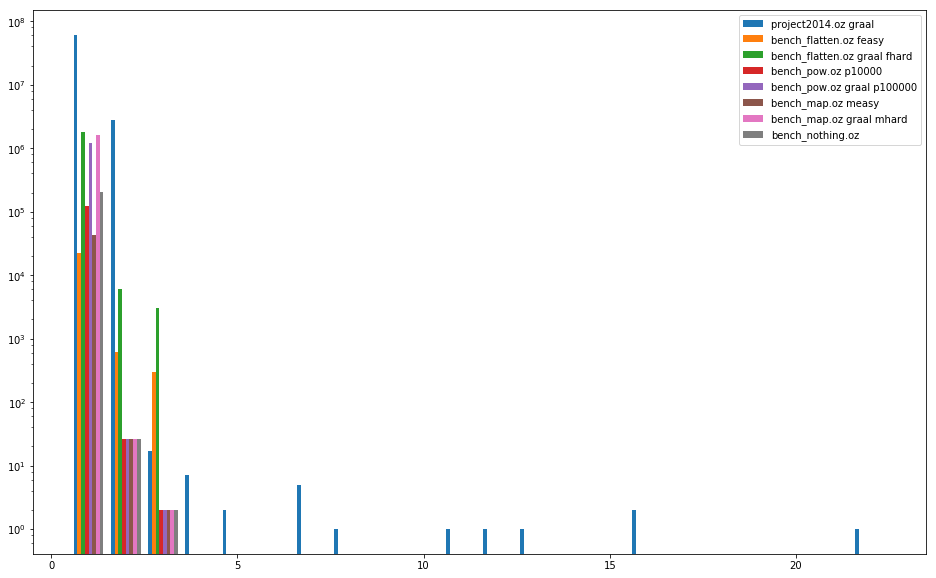

In [6]:
ideal()
nlinks.hist().show()

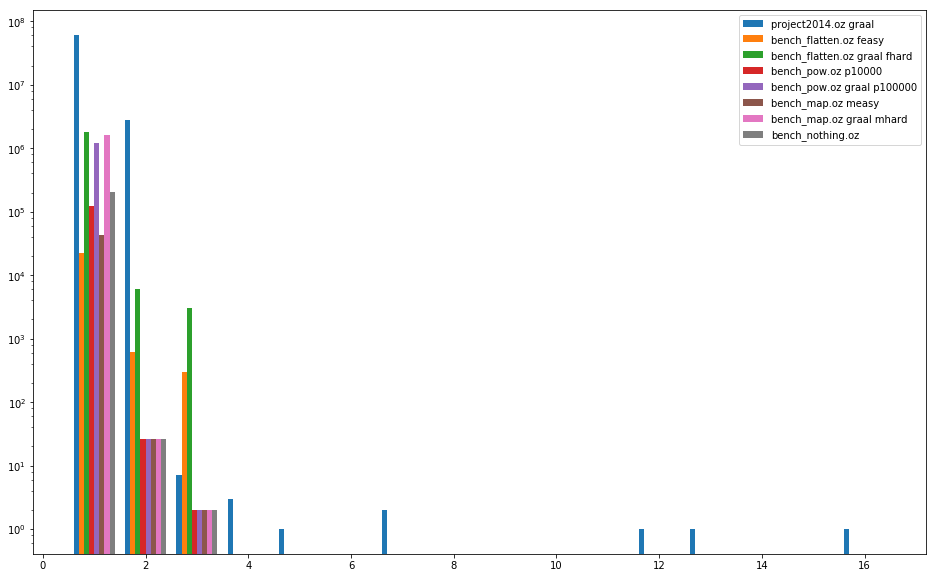

In [10]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
nlinks.hist().show()

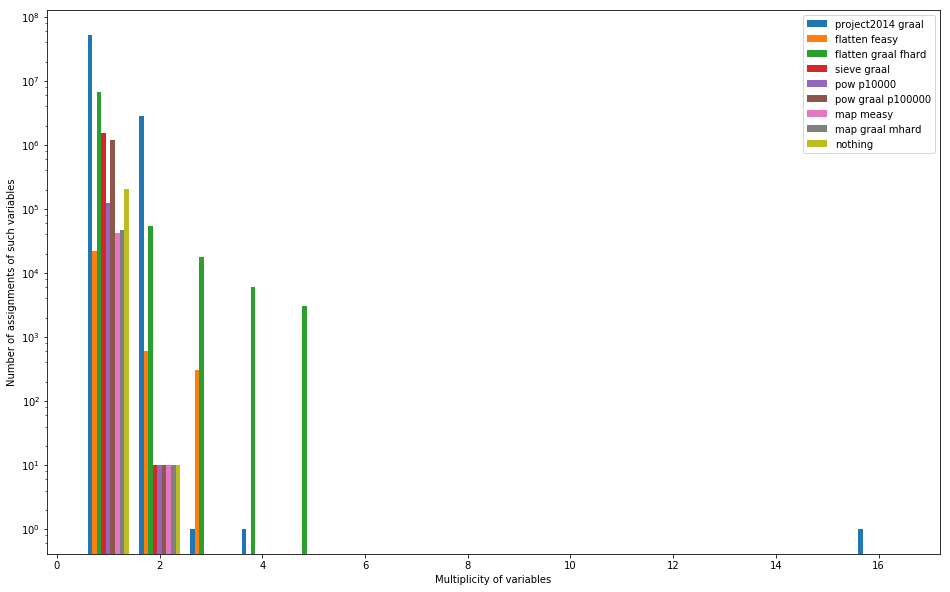

In [13]:
medium()
nlinks = Serie("nlinks").get("nlinks", conv=asis)
nlinks.hist()
plt.xlabel("Multiplicity of variables")
plt.ylabel("Number of assignments of such variables")
plt.show()

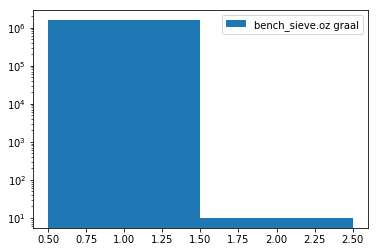

In [74]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
nlinks.hist().show()

In [21]:
# Without captured variables
nlinks = Serie("nvars").get("nvars", conv=asis)
nlinks.mat

[[83288050], [74816697]]

In [30]:
# Without optimization, with dynamic, with bad one
nlinks = Serie("nvars").get("nvars", conv=asis)
nlinks.mat

[[59047],
 [56237],
 [58625],
 [3660037],
 [3657227],
 [3659615],
 [139146],
 [136320],
 [138722],
 [1219146],
 [1216320],
 [1218722],
 [59652],
 [56821],
 [59229],
 [1623552],
 [1620721],
 [1623129],
 [219143],
 [216320],
 [218720]]

In [219]:
# With good static one, without
nvars = Serie("nvars").get("nvars", conv=asis)
direct = [x[0] for x in nvars.mat[0::3]]
deopt_v = [x[0] for x in nvars.mat[1::3]]
deopt_pv = [x[0] for x in nvars.mat[2::3]]
sections = nvars.sections[0::3]
print("\n".join(str(x) for x in nvars.mat))
for sec, d, dv, dpv in zip(sections, direct, deopt_v, deopt_pv):
    v=dv-d
    p=dpv-dv
    dp=d+p
    vp = p+v
    assert dp == dpv-v
    assert vp == dpv-d
    
    print(r"""{} & {} & {} ({:.2f}\%) & {} ({:.2f}\%) & {} ({:.2f}\%) \\ \hline""".format(sec, dpv,
                                                                  dv, -p*100/dpv,
                                                                  dp, -v*100/dpv,
                                                                  d, -vp*100/dpv)\
          .replace("_", "\_").replace(" graal", ""))

[74818035]
[83288482]
[139775830]
[59591]
[62143]
[134339]
[324386381]
[324388933]
[648902129]
[10119772]
[10122337]
[20153950]
[101019772]
[101022337]
[201053950]
[19718]
[22283]
[53796]
project2014 & 139775830 & 83288482 (-40.41\%) & 131305383 (-10.17\%) & 74818035 (-46.47\%) \\ \hline
flatten\_easy & 134339 & 62143 (-53.74\%) & 131787 (-4.11\%) & 59591 (-55.64\%) \\ \hline
flatten\_hard & 648902129 & 324388933 (-50.01\%) & 648899577 (-0.00\%) & 324386381 (-50.01\%) \\ \hline
map\_easy & 20153950 & 10122337 (-49.77\%) & 20151385 (-0.03\%) & 10119772 (-49.79\%) \\ \hline
map\_hard & 201053950 & 101022337 (-49.75\%) & 201051385 (-0.00\%) & 101019772 (-49.75\%) \\ \hline
nothing & 53796 & 22283 (-58.58\%) & 51231 (-11.51\%) & 19718 (-63.35\%) \\ \hline


## Project

In [7]:
print(Serie("project")["total"].sections)
Serie("project")["total"].mat

['project2014.oz mozart2', 'project2014.oz graal', 'project2014.oz graal no_unlink']


array([[ 24.397664  ],
       [ 16.03142228],
       [ 25.20116312]])

In [15]:
print(Serie("project")["total"].sections)
Serie("project")["total"].mat

['project2014.oz mozart2', 'project2014.oz graal', 'project2014.oz graal no_unlink']


array([[ 25.075385  ],
       [ 20.38533012],
       [ 23.74126553]])

In [75]:
print(Serie("project")["total"].sections)
print(Serie("project", n=range(20)).get("total", agg=mean).mat)
print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

['project2014.oz graal', 'project2014.oz graal lazyvars', 'project2014.oz graal no_unlink']
[[ 18.14043916]
 [ 19.04286377]
 [ 22.77929087]]
[[83288050], [74816695], [83288050]]


In [80]:
print(Serie("project")["total"].sections)
print(Serie("project", n=range(1)).get("total", agg=mean).mat)
print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

['project2014.oz graal no_direct', 'project2014.oz graal', 'project2014.oz graal no_unlink']
[[ 16.91007273]
 [ 20.76421235]
 [ 24.9695205 ]]
[[83288228], [74817332], [74817332]]


2017-05-23 17:17:04.241125
['project2014 mozart2', 'project2014 mozart1', 'project2014 graal']


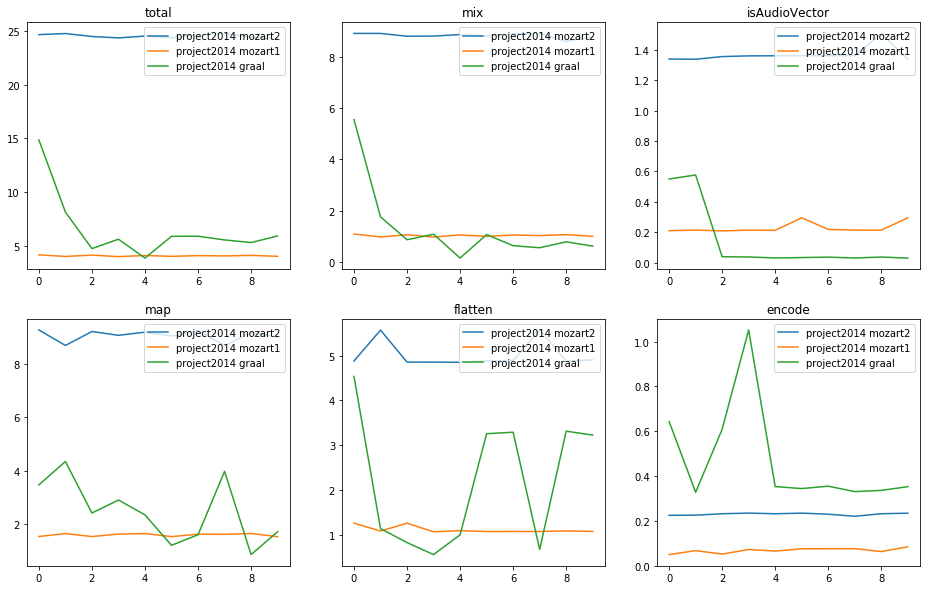

In [19]:
medium()
print(Serie("project")["total"].sections)
project = Serie("project", n=range(1))
total, mix, isAudio, map_, flatten, encode = project.get(("total", "mix", "isAudioVector", "mapped", "flattenned", "encoded"), agg=geomean)

total.sub(231, title="total").plot(yscale=None)
mix.sub(232, title="mix").plot(yscale=None)
isAudio.sub(233, title="isAudioVector").plot(yscale=None)
map_.sub(234, title="map").plot(yscale=None)
flatten.sub(235, title="flatten").plot(yscale=None)
encode.sub(236, title="encode").plot(yscale=None)
#print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

2017-05-28 18:02:41.307715
['project2014 mozart2', 'project2014 mozart1', 'project2014 graal']


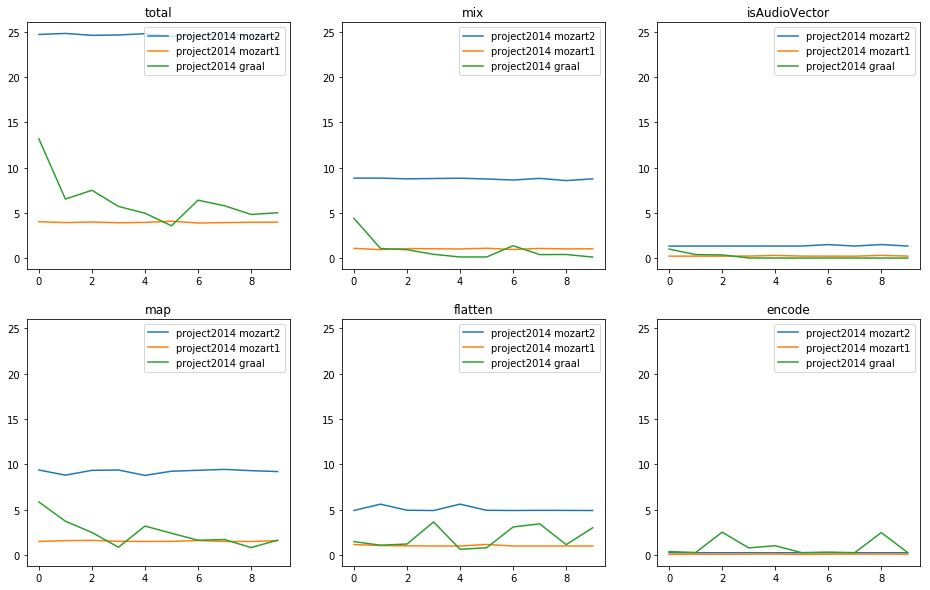

In [101]:
medium()
print(Serie("project")["total"].sections)
project = Serie("project", n=range(1))
total, mix, isAudio, map_, flatten, encode = project.get(("total", "mix", "isAudioVector", "mapped", "flattenned", "encoded"),
                                                         sections=[0, 1, 2],
                                                         agg=geomean)
ax = []
total.sub(231, init_axis=ax, title="total").plot(yscale=None)
mix.sub(232, sharey=ax[0], title="mix").plot(yscale=None)
isAudio.sub(233, sharey=ax[0], title="isAudioVector").plot(yscale=None)
map_.sub(234, sharey=ax[0], title="map").plot(yscale=None)
flatten.sub(235, sharey=ax[0], title="flatten").plot(yscale=None)
encode.sub(236, sharey=ax[0], title="encode").plot(yscale=None)
#print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

## Cost of measurements

Of course, in the previous graphs, it may have been possible the measure would be non-negligible in some results. Let's plot a no-op benchmark in order to see the order of magnitude

2017-05-28 22:44:24.228140


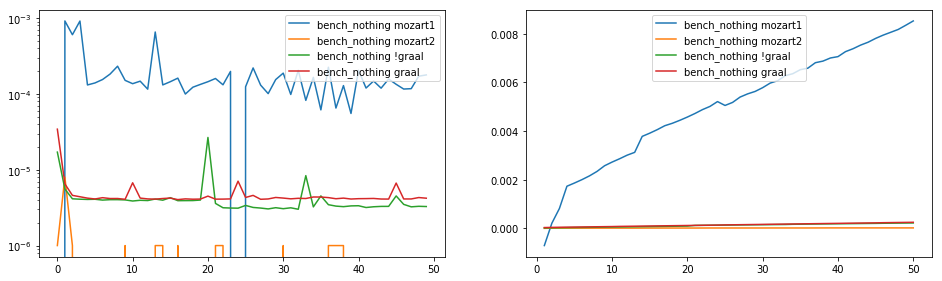

median [  1.42349500e-04   0.00000000e+00   3.54650000e-06   4.17550000e-06]


In [115]:
medium()

nothing = Serie("nothing")["50"]
nothing.sub(221).plot()
nothing.sub(222).prog()
plt.show()

print("median", nothing.agg(np.median))